In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
South = df.loc[df.location == 'South']
North = df.loc[df.location == 'North']

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

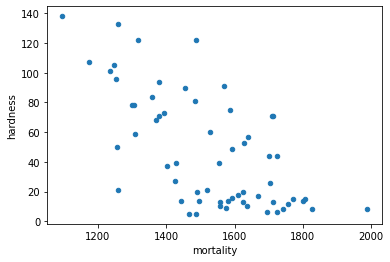

In [4]:
# Строим график изменения жесткости воды от смертности
df.plot(kind='scatter', x='mortality', y='hardness')

In [27]:
def coef(data):
    
    """
    Функция возвращает коэффициенты Пирсона, Спирмена, Канделла
    
    """

    # Коэффициент корреляции Пирсона

    Pirson = data[['mortality', 'hardness']].corr().hardness[0]
    print(f'Коэффициент корреляции Пирсона: {round(Pirson,3)}')

    # Коэффициент корреляции Спирмена

    Spearman = data[['mortality', 'hardness']].corr(method='spearman').hardness[0]
    print(f'Коэффициент корреляции Спирмена: {round(Spearman,3)}')
    
    # Коэффициент корреляции Канделла
    Kendall = data[['mortality', 'hardness']].corr(method='kendall').hardness[0]
    print(f'Коэффициент корреляции Канделла: {round(Kendall,3)}')

In [28]:
coef(df)

Коэффициент корреляции Пирсона: -0.655
Коэффициент корреляции Спирмена: -0.632
Коэффициент корреляции Канделла: -0.454


Коэффициент корреляции имеет отрицательно значение. 

Наблюдаем обратную связь двух величин. Связь слобовыражена.

С уменьшением жесткости воды смертность растет.

In [14]:
def function(X_axis, Y_axis):
    
        """
        Функция считает коэффициент детерминации и выводит график остатков
    
        """
        X = X_axis
        y = Y_axis
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
        
        # Смотри сколько у нас значений в пренировоцном цикле и в тестовом
        
        # print(f' Тренировочных значений: {y_train.shape[0]} ')
        # print(f' Тестовых значений: {y_test.shape[0]} ')

        # Обращаемся к классу LinearRegression() и записываем его в переменную model
        model = LinearRegression()
        
        # Тренируем нашу модель 
        model.fit(X_train, y_train)
        
        # Найдем значения а и b для нашей функции y = ax + b

        a = model.coef_[0]
        b = model.intercept_

        print(f'a = {round(a,3)}')
        print(f'b = {round(b,2)}')

        # На основе тестовых значений смертности прогнозируем наши значения жесткости воды
        y_pred = model.predict(X_test)
        
        # Коэффициент детерминации
        R2 = model.score(X_test, y_test)
        print(f'Коэффициент детерминации: {round(R2,3)} ')
        
        plt.scatter(X_test, y_test)
        plt.plot(X_test, y_pred, c='r')

a = -0.127
b = 239.37
Коэффициент детерминации: 0.495 


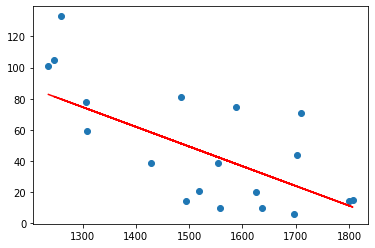

In [15]:
# Для северных и южных городов
function(df[['mortality']], df['hardness'])

### Для северных городов

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

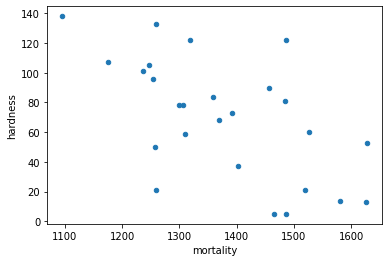

In [16]:
# Строим график изменения жесткости воды от смертности
South.plot(kind='scatter', x='mortality', y='hardness')

In [30]:
coef(South)

Коэффициент корреляции Пирсона: -0.602
Коэффициент корреляции Спирмена: -0.596
Коэффициент корреляции Канделла: -0.44


a = -0.181
b = 324.12
Коэффициент детерминации: -0.052 


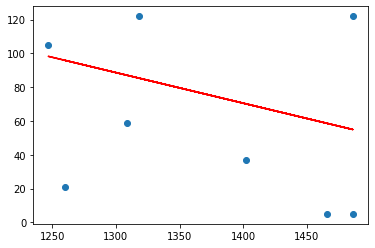

In [18]:
function(South[['mortality']], South['hardness'])

### Для южных городов

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

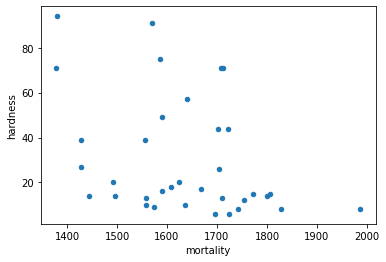

In [19]:
# Строим график изменения жесткости воды от смертности
North.plot(kind='scatter', x='mortality', y='hardness')

In [29]:
coef(North)

Коэффициент корреляции Пирсона: -0.369
Коэффициент корреляции Спирмена: -0.404
Коэффициент корреляции Канделла: -0.283


a = -0.098
b = 191.73
Коэффициент детерминации: -0.349 


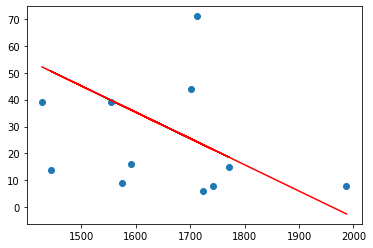

In [21]:
function(North[['mortality']], North['hardness'])

Для северных и южных городов аналогичная зависимость сохраняется